# Bài tập TH Decision Tree, Random Forest


- Thực hiện các yêu cầu dưới đây với tập dữ liệu Australian credit
- Down dữ liệu tại đường link dưới đây

  https://archive.ics.uci.edu/ml/datasets/Statlog+(Australian+Credit+Approval)
    

# Các bước làm

In [ ]:
# import packages,...
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, ShuffleSplit, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

random_state = 0
# set random_state = 0


## Tìm hiểu dữ liệu

In [ ]:
'''
- Tìm hiểu cấu trúc data tại trang web UCI
- Down các files, đặt trong folder data/
- Chú ý:
    - Đọc mô tả dữ liệu trong file 'australian.doc'
    - Kiểm tra DecisionTree/RandomForest của Sklearn có hỗ trợ với kiểu dữ liệu được cung cấp không
'''
data_path = 'australian.dat'
credit=np.genfromtxt(data_path)
print(credit)
X, y = credit[:,:-1], credit[:,-1]

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)


[[1.000e+00 2.208e+01 1.146e+01 ... 1.000e+02 1.213e+03 0.000e+00]
 [0.000e+00 2.267e+01 7.000e+00 ... 1.600e+02 1.000e+00 0.000e+00]
 [0.000e+00 2.958e+01 1.750e+00 ... 2.800e+02 1.000e+00 0.000e+00]
 ...
 [0.000e+00 1.883e+01 9.540e+00 ... 1.000e+02 1.000e+00 1.000e+00]
 [0.000e+00 2.742e+01 1.450e+01 ... 1.200e+02 1.200e+01 1.000e+00]
 [1.000e+00 4.100e+01 4.000e-02 ... 5.600e+02 1.000e+00 1.000e+00]]
(690, 14) (690,)
(552, 14) (138, 14)


In [ ]:
# import pandas as pd

# # Convert to DataFrame for better inspection
# columns = [f'feature_{i}' for i in range(X.shape[1])] + ['target']
# data = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))), columns=columns)

# # Basic statistics
# print(data.describe())

# # Check for missing values
# print(data.isnull().sum())

# # Check the distribution of the target variable
# print(data['target'].value_counts())


        feature_0   feature_1   feature_2   feature_3   feature_4   feature_5  \
count  690.000000  690.000000  690.000000  690.000000  690.000000  690.000000   
mean     0.678261   31.568203    4.758725    1.766667    7.372464    4.692754   
std      0.467482   11.853273    4.978163    0.430063    3.683265    1.992316   
min      0.000000   13.750000    0.000000    1.000000    1.000000    1.000000   
25%      0.000000   22.670000    1.000000    2.000000    4.000000    4.000000   
50%      1.000000   28.625000    2.750000    2.000000    8.000000    4.000000   
75%      1.000000   37.707500    7.207500    2.000000   10.000000    5.000000   
max      1.000000   80.250000   28.000000    3.000000   14.000000    9.000000   

        feature_6   feature_7   feature_8  feature_9  feature_10  feature_11  \
count  690.000000  690.000000  690.000000  690.00000  690.000000  690.000000   
mean     2.223406    0.523188    0.427536    2.40000    0.457971    1.928986   
std      3.346513    0.499824 

##  Decision Tree

###  Khảo sát với các giá trị khác nhau của max_depth dùng phương pháp cross-validation
![image.png](attachment:image.png)

Text(0.5, 1.0, 'DT validation curve for max_depth')

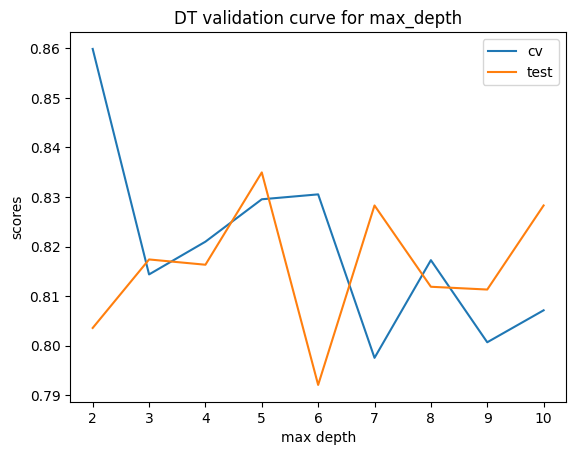

In [ ]:
# code
# Trước hết, hãy thử khảo sát DT với tham số max_depth
cv_accuracies_by_depth, test_accuracies_by_depth= [], []
max_depth_values= np.arange(2,11)

for curr_max_depth in max_depth_values:
  tree= DecisionTreeClassifier(random_state=random_state, max_depth=curr_max_depth)

  # cross-validation
  val_scores= cross_val_score(estimator=tree, X=X_train, y=y_train, cv=5, scoring='f1')
  cv_accuracies_by_depth.append(val_scores.mean())

  # test
  tree.fit(X_train, y_train)
  curr_pred= tree.predict(X_test)
  test_accuracies_by_depth.append(f1_score(curr_pred, y_test))

# Plot
plt.plot(max_depth_values, cv_accuracies_by_depth, label='cv')
plt.plot(max_depth_values, test_accuracies_by_depth, label='test')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('scores')
plt.title('DT validation curve for max_depth')

###  Parameter tuning    

In [ ]:
# code
# Một số hàm hỗ trợ
def grid_search(algorithm, n_jobs, dict_param):
    if algorithm == 'decision-tree':
        model = DecisionTreeClassifier()
    if algorithm == 'random-forest':
        model = RandomForestClassifier()
    classifier = GridSearchCV(estimator=model, cv=5, param_grid=dict_param,
                            n_jobs=n_jobs, scoring='f1')
    classifier.fit(X_train, y_train)
    print('Best model', end='')
    print(classifier.best_estimator_)
    return classifier.best_estimator_

def evaluate(model):
    print("Train Accuracy :", accuracy_score(y_train, model.predict(X_train)))
    print("Train f1 score :", f1_score(y_train, model.predict(X_train)))
    print("Train roc auc :", roc_auc_score(y_train, model.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, model.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, model.predict(X_test)))
    print("Test f1 score :", f1_score(y_test, model.predict(X_test)))
    print("Test roc auc :", roc_auc_score(y_test, model.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, model.predict(X_test)))

def plot_learning_curve(estimator, title, label_curve, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), new_plot=False,
                        idx_color=0):
    # Khởi tạo bức ảnh mới với thư viện plot lib
    if new_plot:
        # plt.figure()
        plt.title(title)
        plt.xlabel("Training examples")
        plt.ylabel("Score")
        plt.grid()
    # chú thích nếu có
    if ylim is not None:
        plt.ylim(*ylim)

    # thực hiện training model, ghi nhận các giá trị trong quá trình training
    # cv = số fold cross validate, số phần bộ dữ liệu được chia để thực hiện training testing.
    # train_sizes = mảng tỉ lệ, các tỉ lệ được hệ thống chọn làm điểm dừng để thực hiện 1 testing
    #  train_sizes = [0.3, 0.5] => hệ thống lấy 30 % dữ liệu để train và thực hiện test, tương tự 50 % ..
    # scoring = hàm mục tiêu để đánh giá chất lượng mô hình và vẽ lên đồ thị
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring="f1")
    # Lấy trung bình cộng các giá trị output của các fold
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # thực hiện vẽ các giá trị số lên đồ thị với màu vừa được random
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='r',
             label=label_curve['test'])
    plt.plot(train_sizes, train_scores_mean, 'o-', color='g',
             label=label_curve['train'])

    plt.legend(loc="best")
    return plt

Best modelDecisionTreeClassifier(max_depth=2, min_samples_leaf=5)
Train Accuracy : 0.8586956521739131
Train f1 score : 0.8597122302158273
Train roc auc : 0.8637563344594594
Train Confusion Matrix:
[[235  61]
 [ 17 239]]
--------------------------------------------------
Test Accuracy : 0.8405797101449275
Test f1 score : 0.8035714285714286
Test roc auc : 0.8492224475997295
Test Confusion Matrix:
[[71 16]
 [ 6 45]]


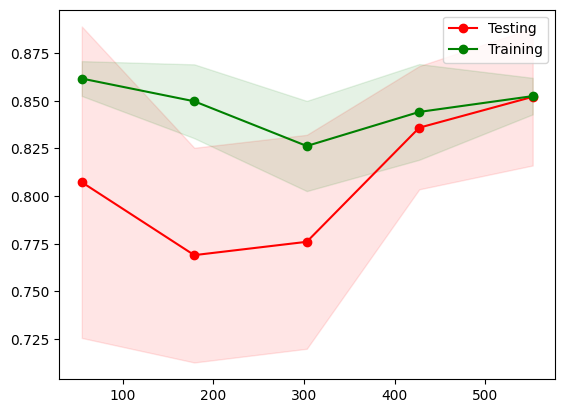

In [ ]:
# Thử sử dụng GridSearchCV để khảo sát
dict_param = {
    'max_depth': [2, 3, 5, 7, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
best_tree = grid_search('decision-tree', n_jobs=-1, dict_param=dict_param)
evaluate(best_tree)
# hàm plot_learning_curve
plot_learning_curve(best_tree, "Learning Curve", {'train': 'Training', 'test': 'Testing'}, X, y, cv=5, n_jobs=-1)
plt.show()

Top 10 feature importances
Feature  0 - 0.889083259850707
Feature  1 - 0.08192040596370587
Feature  2 - 0.028996334185587006
Feature  3 - 0.0
Feature  4 - 0.0
Feature  5 - 0.0
Feature  6 - 0.0
Feature  7 - 0.0
Feature  8 - 0.0
Feature  9 - 0.0


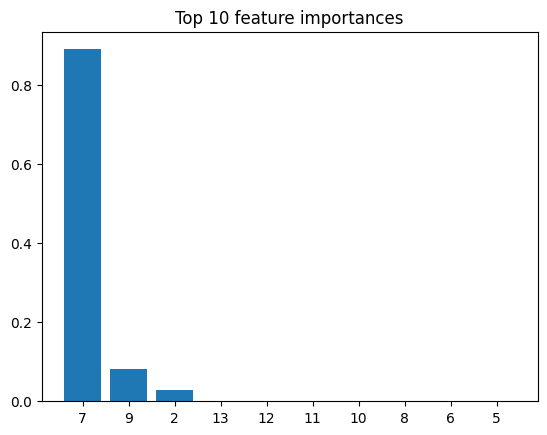

In [ ]:
# Nhận xét về độ quan trọng của từng feature
importances = best_tree.feature_importances_
indices = np.argsort(importances)[::-1]
print('Top 10 feature importances')
for i in range(10):
    print('Feature ', i, '-', importances[indices[i]])
indices = indices[:10]
plt.figure()
plt.title('Top 10 feature importances')
plt.bar(range(10), importances[indices])
plt.xticks(range(10), indices)
plt.show()

## Random Forest

### Khảo sát với các giá trị khác nhau của num_trees

Text(0.5, 1.0, 'RF validation curve for num trees')

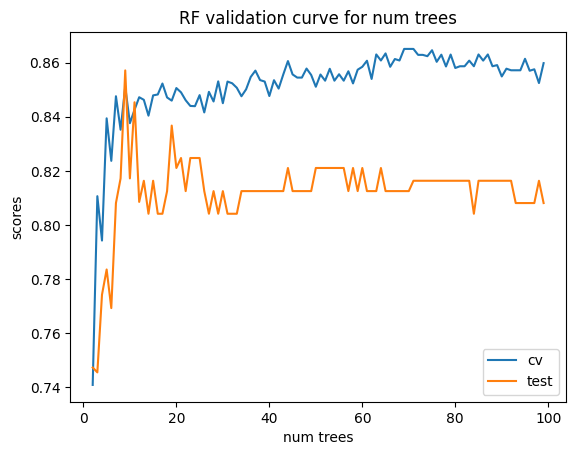

In [ ]:
# code
# code
# Trước hết, hãy thử khảo sát DT với tham số max_depth
cv_accuracies_by_depth, test_accuracies_by_depth= [], []
num_trees_values = np.arange(2,100)

for curr_num_trees in num_trees_values:
  tree= RandomForestClassifier(n_estimators = curr_num_trees,random_state=random_state)

  # cross-validation
  val_scores= cross_val_score(estimator=tree, X=X_train, y=y_train, cv=5, scoring='f1')
  cv_accuracies_by_depth.append(val_scores.mean())

  # test
  tree.fit(X_train, y_train)
  curr_pred= tree.predict(X_test)
  test_accuracies_by_depth.append(f1_score(curr_pred, y_test))

# Plot
plt.plot(num_trees_values, cv_accuracies_by_depth, label='cv')
plt.plot(num_trees_values, test_accuracies_by_depth, label='test')
plt.legend()
plt.xlabel('num trees')
plt.ylabel('scores')
plt.title('RF validation curve for num trees')

### Parameter tuning

Best modelRandomForestClassifier(max_depth=27, max_features=6, min_samples_leaf=5,
                       n_estimators=60)
Train Accuracy : 0.9202898550724637
Train f1 score : 0.9140625
Train roc auc : 0.9198690878378378
Train Confusion Matrix:
[[274  22]
 [ 22 234]]
--------------------------------------------------
Test Accuracy : 0.8623188405797102
Test f1 score : 0.8118811881188119
Test roc auc : 0.850236646382691
Test Confusion Matrix:
[[78  9]
 [10 41]]


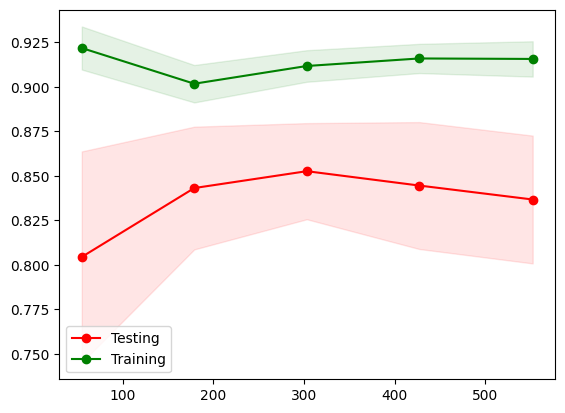

In [ ]:
# code
dict_param = {
    'max_depth': [3, 11, 15, 24, 27],
    'min_samples_leaf': [1, 5, 7, 9, 15, 24],
    'max_features':  [4, 6, 10, 16],
    'n_estimators': [60]
}

# - Tìm best_forest
best_forest = grid_search('random-forest', n_jobs=-1, dict_param=dict_param)
evaluate(best_forest)
# plot_learning_curve với đủ các tham số bắt buộc
plot_learning_curve(best_forest, "Learning Curve", {'train': 'Training', 'test': 'Testing'}, X, y, cv=5, n_jobs=-1)
plt.show()


Top 10 feature importances
Feature  0 - 0.45831097249005676
Feature  1 - 0.12797590661465102
Feature  2 - 0.06753513240595471
Feature  3 - 0.06379441011192102
Feature  4 - 0.06370020557543254
Feature  5 - 0.061685340467512444
Feature  6 - 0.057374325636836684
Feature  7 - 0.04881024549518818
Feature  8 - 0.025501403839600686
Feature  9 - 0.007816357558884197


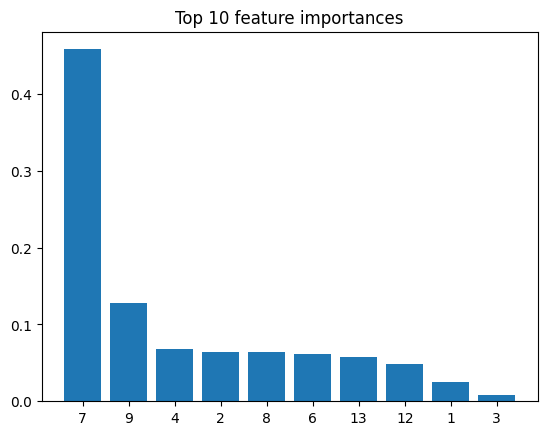

In [ ]:
# Nhận xét về độ quan trọng của từng feature
importances = best_forest.feature_importances_
indices = np.argsort(importances)[::-1]
print('Top 10 feature importances')
for i in range(10):
    print('Feature ', i, '-', importances[indices[i]])

indices = indices[:10]
plt.figure()
plt.title('Top 10 feature importances')
plt.bar(range(10), importances[indices])
plt.xticks(range(10), indices)
plt.show()